In [1]:
#importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt         # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")



## Final Project : Classification
This is the bsolution for the **Internshala Data Science final project : classification**. In this notebook:

1)-We will first explore the dataset provided.

2)-We will create models to predict to predict the rainfall.

In [2]:
# loading the dataset to pandas Data Frame
data = pd.read_excel('sydney_rain prediction.xlsx')

Let's check the features present in our data and then we will look at their data types.

In [3]:
#for data
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

It can be infered that Rain Tommorrow is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [4]:
print(data.shape) 

(3337, 17)


We have 17 independent variables and 1 target variable, i.e. RainTommorrow in the dataset. We will predict the RainTommorrow with the help of model built using the given data.

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [5]:
# data types for each variable
print(data.dtypes)

Date            datetime64[ns]
Location                object
MinTemp                float64
MaxTemp                float64
Rainfall               float64
Evaporation            float64
Sunshine               float64
Humidity9am            float64
Humidity3pm            float64
Pressure9am            float64
Pressure3pm            float64
Cloud9am               float64
Cloud3pm               float64
Temp9am                float64
Temp3pm                float64
RainToday               object
RainTomorrow            object
dtype: object


We can see there are two format of data types:

1) object: Object format means variables are categorical. Categorical variables in our dataset are: Location, Raintoday, RainTommorrow

2) float64: It represents the decimal variables. Float variables in our dataset are: MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity9pm, Humidity3pm, Humidity3am, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm

In [6]:
#first five rows of the dataset
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. RainTomorrow. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [7]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     2472
Yes     865
Name: count, dtype: int64

In [8]:
# Normalize can be set to True to print proportions instead of number 
data['RainTomorrow'].value_counts(normalize=True)

RainTomorrow
No     0.740785
Yes    0.259215
Name: proportion, dtype: float64

<Axes: xlabel='RainTomorrow'>

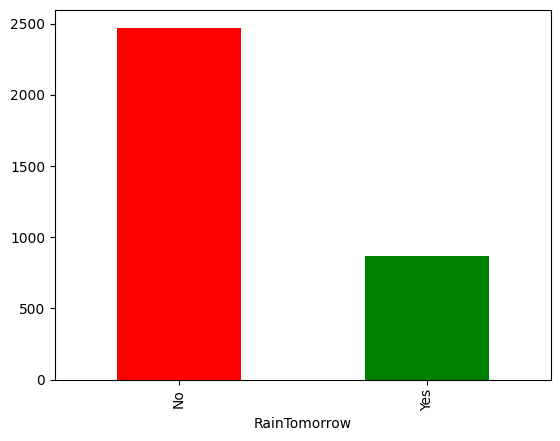

In [9]:
# plotting the bar plot of frequencies
data['RainTomorrow'].value_counts().plot.bar(color=['red','green'])

So, 2472 field out of total 3337 have No Rainfall which is around 74%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of Rainfall variable .

<Axes: xlabel='Rainfall', ylabel='Density'>

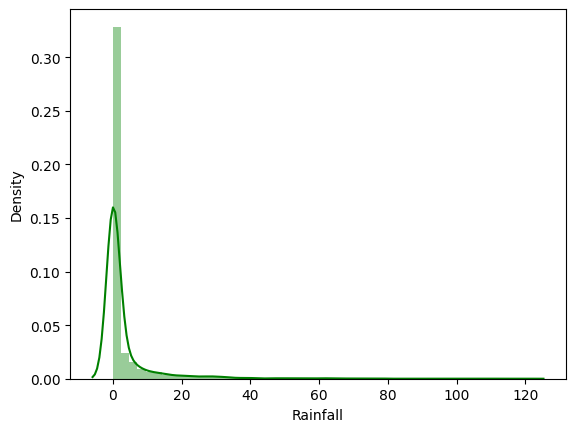

In [10]:
sns.distplot(data["Rainfall"],color='green')

We can infer that most of the data fall in the  group between 0-5.So there may be no outlier in data according to the busineess knowledge. Now let's look at  RainfallToday. As RainfallToday is a categorical variable, we will look at its frequency table

In [11]:
data['RainToday'].value_counts()

RainToday
No     2465
Yes     866
Name: count, dtype: int64

In [12]:
# Normalize can be set to True to print proportions instead of number 
data['RainToday'].value_counts(normalize=True)

RainToday
No     0.740018
Yes    0.259982
Name: proportion, dtype: float64

<Axes: xlabel='RainToday'>

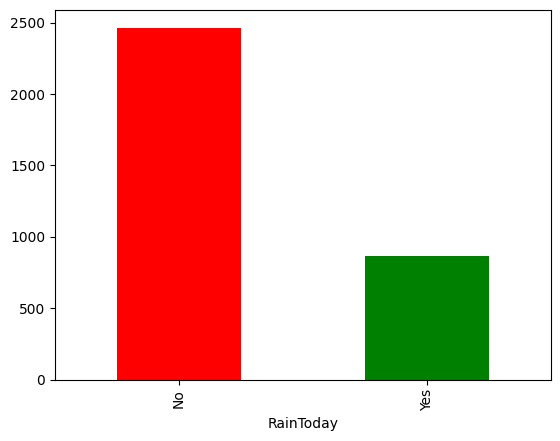

In [15]:
# plotting the bar plot of frequencies
data['RainToday'].value_counts().plot.bar(color=['red','green'])

So, 2465 field out of total 3337 have No Rainfall which is around 74%. Let's now explore the variables to have a better understanding of the dataset. 


 We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with RainToday and RainTommorrow variable.

 Let's look at the location and the date features

In [13]:
data['Location'].value_counts()

Location
Sydney    3337
Name: count, dtype: int64

Since location contains only one category we can remove it from the dataset as it will not affect the data

In [14]:
del data['Location']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   MinTemp       3334 non-null   float64       
 2   MaxTemp       3335 non-null   float64       
 3   Rainfall      3331 non-null   float64       
 4   Evaporation   3286 non-null   float64       
 5   Sunshine      3321 non-null   float64       
 6   Humidity9am   3323 non-null   float64       
 7   Humidity3pm   3324 non-null   float64       
 8   Pressure9am   3317 non-null   float64       
 9   Pressure3pm   3318 non-null   float64       
 10  Cloud9am      2771 non-null   float64       
 11  Cloud3pm      2776 non-null   float64       
 12  Temp9am       3333 non-null   float64       
 13  Temp3pm       3333 non-null   float64       
 14  RainToday     3331 non-null   object        
 15  RainTomorrow  3337 non-null   object  

### Bivariate Analysis

RainTomorrow    No  Yes
RainToday              
No            2045  420
Yes            423  443


Text(0, 0.5, 'Percentage')

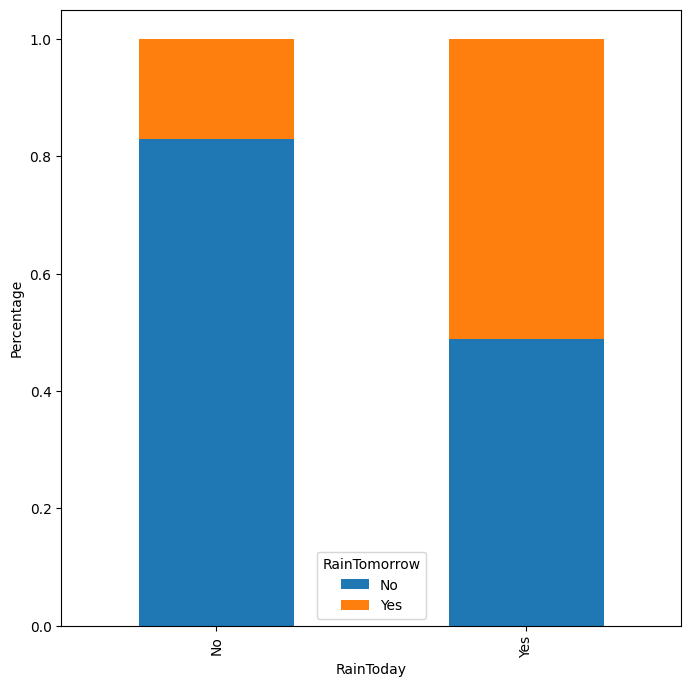

In [15]:
print(pd.crosstab(data['RainToday'],data['RainTomorrow']))

job=pd.crosstab(data['RainToday'],data['RainTomorrow'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('RainToday')
plt.ylabel('Percentage')

From the above graph, we can infer that if there is RainToday, there are higher chances of RainTomorrow. The possible reason is that the number of occurrences of RainToday is less, and in comparison to other weather conditions, more instances of RainTomorrow are observed.



In [16]:
data['RainTomorrow'].replace('No', 0,inplace=True)
data['RainTomorrow'].replace('Yes', 1,inplace=True)

In [17]:
data['RainToday'].replace('No', 0,inplace=True)
data['RainToday'].replace('Yes', 1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   MinTemp       3334 non-null   float64       
 2   MaxTemp       3335 non-null   float64       
 3   Rainfall      3331 non-null   float64       
 4   Evaporation   3286 non-null   float64       
 5   Sunshine      3321 non-null   float64       
 6   Humidity9am   3323 non-null   float64       
 7   Humidity3pm   3324 non-null   float64       
 8   Pressure9am   3317 non-null   float64       
 9   Pressure3pm   3318 non-null   float64       
 10  Cloud9am      2771 non-null   float64       
 11  Cloud3pm      2776 non-null   float64       
 12  Temp9am       3333 non-null   float64       
 13  Temp3pm       3333 non-null   float64       
 14  RainToday     3331 non-null   float64       
 15  RainTomorrow  3337 non-null   int64   

<Axes: >

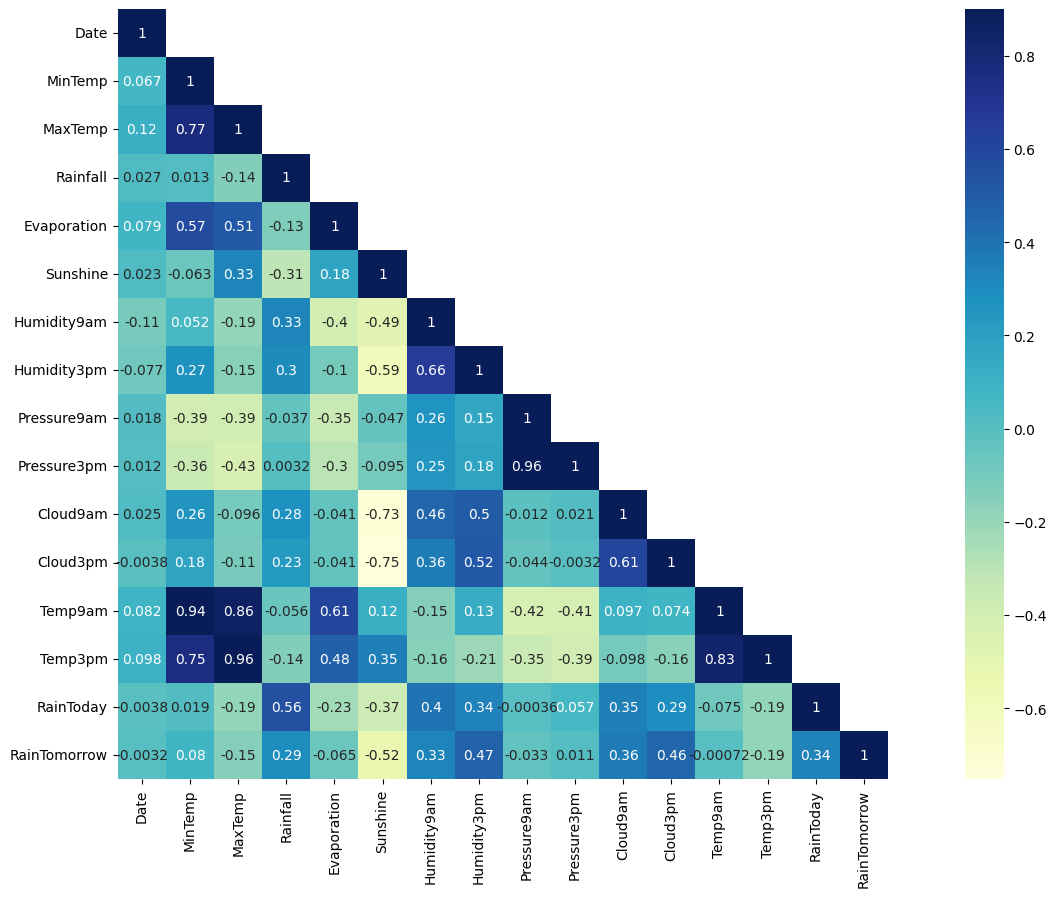

In [19]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [20]:
data.corr()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.067472,0.117589,0.026729,0.079268,0.023476,-0.109267,-0.076616,0.018121,0.012257,0.025409,-0.003765,0.082103,0.098005,-0.003763,-0.003207
MinTemp,0.067472,1.000000,0.770893,0.012883,0.571257,-0.063154,0.052490,0.271686,-0.393827,-0.356406,0.260508,0.180094,0.939116,0.752922,0.018909,0.079975
MaxTemp,0.117589,0.770893,1.000000,-0.140107,0.513138,0.326683,-0.187437,-0.152615,-0.389088,-0.425169,-0.095859,-0.108426,0.859346,0.960457,-0.188070,-0.149285
Rainfall,0.026729,0.012883,-0.140107,1.000000,-0.126143,-0.308044,0.331045,0.301681,-0.037051,0.003216,0.277427,0.229576,-0.056061,-0.143698,0.555191,0.294121
Evaporation,0.079268,0.571257,0.513138,-0.126143,1.000000,0.177628,-0.399019,-0.103246,-0.349421,-0.303330,-0.041160,-0.041205,0.608872,0.477629,-0.232571,-0.065221
Sunshine,0.023476,-0.063154,0.326683,-0.308044,0.177628,1.000000,-0.490967,-0.585736,-0.046654,-0.094841,-0.734302,-0.751838,0.115135,0.345139,-0.367554,-0.523060
Humidity9am,-0.109267,0.052490,-0.187437,0.331045,-0.399019,-0.490967,1.000000,0.659194,0.263977,0.252360,0.459455,0.359910,-0.148239,-0.157598,0.401028,0.329501
Humidity3pm,-0.076616,0.271686,-0.152615,0.301681,-0.103246,-0.585736,0.659194,1.000000,0.154908,0.183647,0.498119,0.517755,0.128818,-0.214047,0.343336,0.472105
Pressure9am,0.018121,-0.393827,-0.389088,-0.037051,-0.349421,-0.046654,0.263977,0.154908,1.000000,0.963173,-0.012196,-0.044233,-0.419440,-0.346731,-0.000357,-0.032536
Pressure3pm,0.012257,-0.356406,-0.425169,0.003216,-0.303330,-0.094841,0.252360,0.183647,0.963173,1.000000,0.020884,-0.003187,-0.405047,-0.392653,0.056993,0.011004


RainTomorrow (the target variable) has some correlation with features like Rainfall, Humidity9am, and Humidity3pm. These features could be important for predicting whether it will rain tomorrow.

MaxTemp and Temp3pm have a strong positive correlation of 0.96. This is expected, as the maximum temperature of the day (MaxTemp) and the temperature at 3 pm (Temp3pm) are likely to be highly correlated.So we will keep the ratio of both the feature

In [21]:
data['MaxTemp/Temp3pm'] = (data['MaxTemp']/ data['Temp3pm']).astype(float)
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp/Temp3pm
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1,1.071770
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1,1.032258
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1,1.065217
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1,1.090909
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1,1.007843


MinTemp and Temp3pm have a strong positive correlation of 0.93. This is expected, as the minimum temperature of the day (MinTemp) and the temperature at 9 am (Temp9am) are likely to be highly correlated.So we will keep the ratio of both the feature

In [22]:
data['MinTemp/Temp9am'] = (data['MinTemp']/ data['Temp9am']).astype(float)
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp/Temp3pm,MinTemp/Temp9am
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1,1.071770,0.942029
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1,1.032258,0.870536
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1,1.065217,0.919149
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1,1.090909,0.943925
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1,1.007843,0.875556


Pressure9am and Pressure3pm have a strong positive correlation of 0.96. This is also expected, as atmospheric pressure at 9 am and 3 pm is likely to be highly correlated.

In [23]:
data['Pressure9am/Pressure3pm'] = (data['Pressure9am']/ data['Pressure3pm']).astype(float)
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp/Temp3pm,MinTemp/Temp9am,Pressure9am/Pressure3pm
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1,1.071770,0.942029,1.000197
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1,1.032258,0.870536,1.001476
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1,1.065217,0.919149,1.001083
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1,1.090909,0.943925,1.002372
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1,1.007843,0.875556,1.003483


<Axes: >

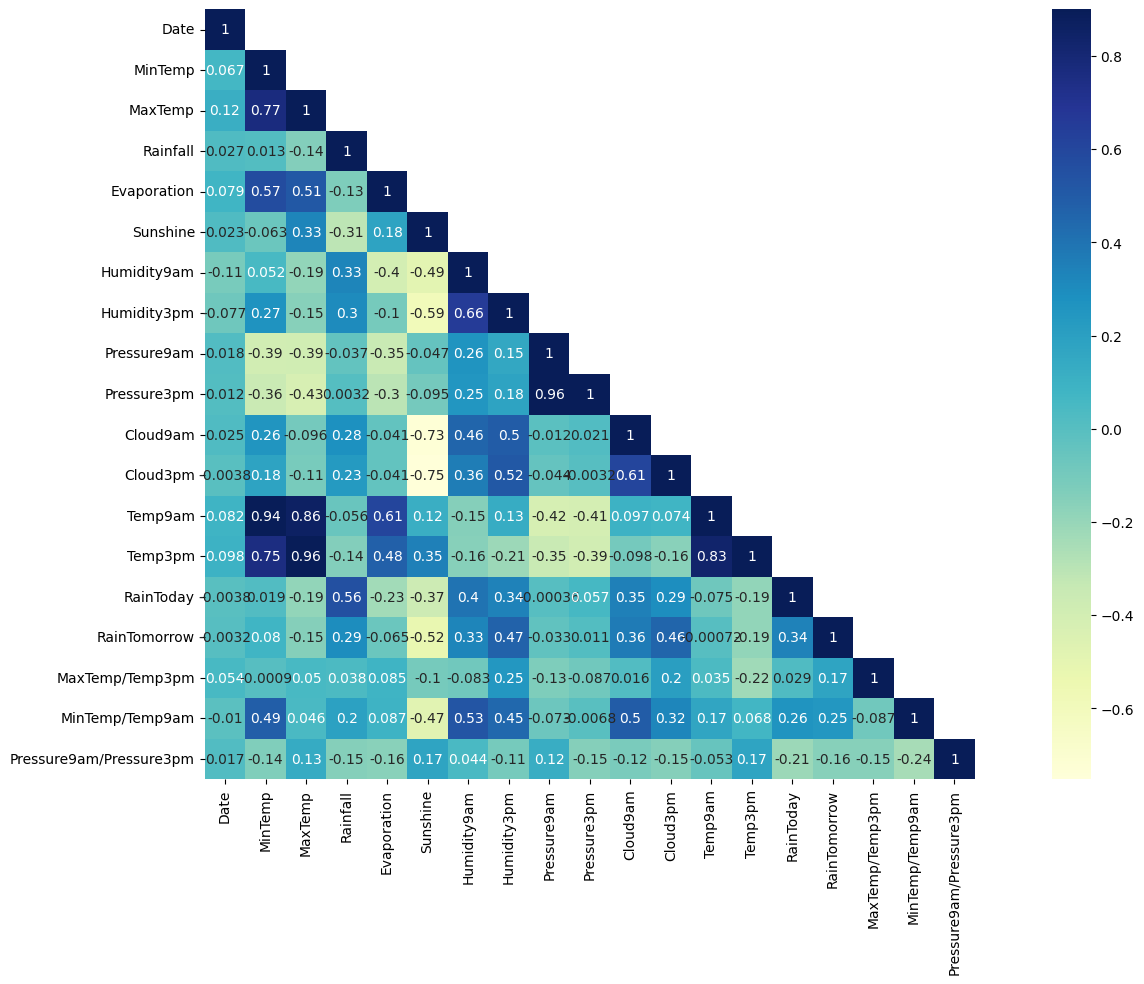

In [24]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Removing the highly correlated data

In [25]:
del data['MaxTemp']
del data['MinTemp']
del data['Temp9am']
del data['Temp3pm']
del data['Pressure3pm']
del data['Pressure9am']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     3337 non-null   datetime64[ns]
 1   Rainfall                 3331 non-null   float64       
 2   Evaporation              3286 non-null   float64       
 3   Sunshine                 3321 non-null   float64       
 4   Humidity9am              3323 non-null   float64       
 5   Humidity3pm              3324 non-null   float64       
 6   Cloud9am                 2771 non-null   float64       
 7   Cloud3pm                 2776 non-null   float64       
 8   RainToday                3331 non-null   float64       
 9   RainTomorrow             3337 non-null   int64         
 10  MaxTemp/Temp3pm          3331 non-null   float64       
 11  MinTemp/Temp9am          3331 non-null   float64       
 12  Pressure9am/Pressure3pm  3309 non-

<Axes: >

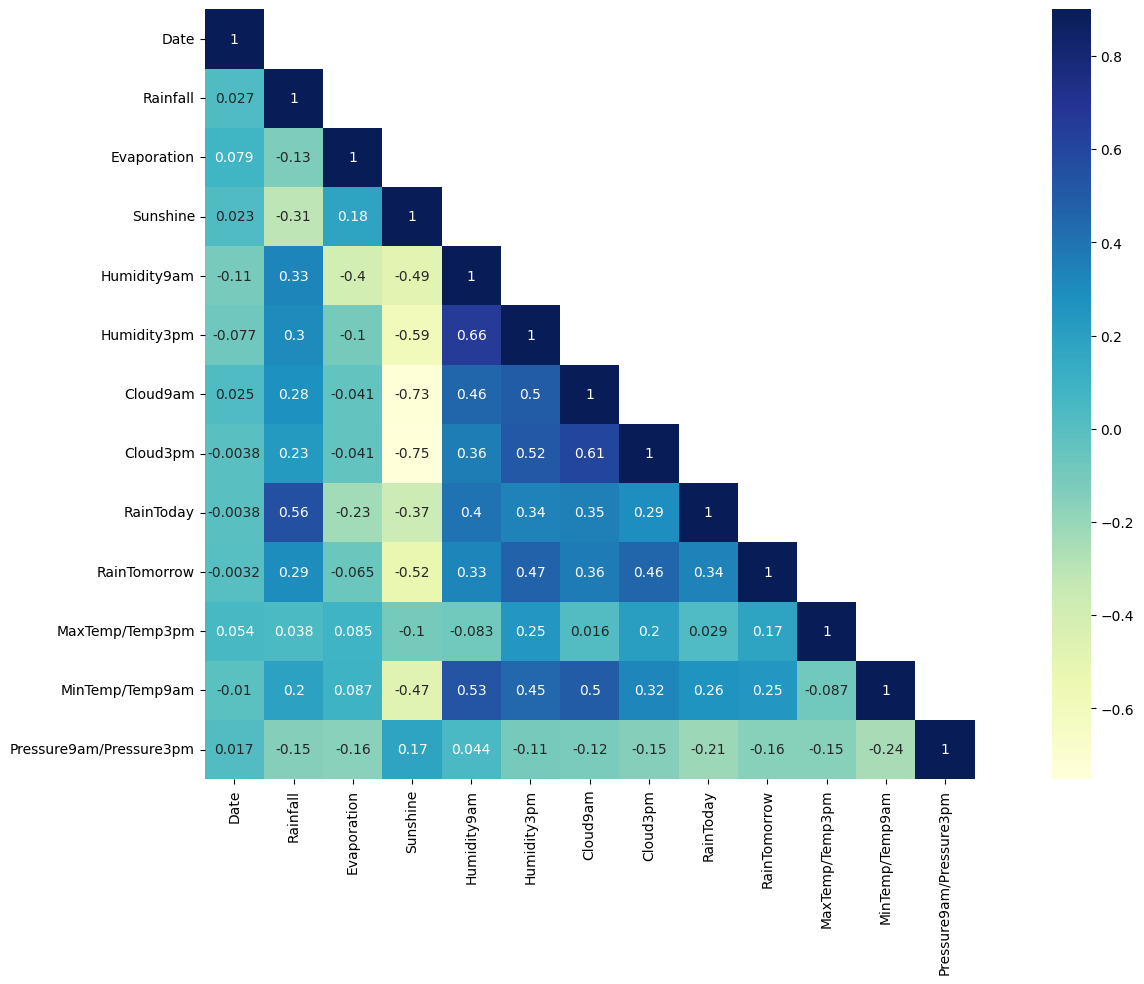

In [26]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [27]:
data.describe()

,Date,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,MaxTemp/Temp3pm,MinTemp/Temp9am,Pressure9am/Pressure3pm
count,3337,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,2771.000000,2776.000000,3331.000000,3337.000000,3331.000000,3331.000000,3309.000000
mean,2012-10-16 01:24:34.737788672,3.330231,5.187432,7.179374,68.229010,54.699158,4.181523,4.218660,0.259982,0.259215,1.071063,0.830065,1.002299
min,2008-02-01 00:00:00,0.000000,0.000000,0.000000,19.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.459302,0.993786
25%,2010-05-15 00:00:00,0.000000,3.200000,4.300000,58.000000,44.000000,1.000000,1.000000,0.000000,0.000000,1.029412,0.774315,1.001171
50%,2012-09-28 00:00:00,0.000000,4.800000,8.300000,69.000000,56.000000,5.000000,4.000000,0.000000,0.000000,1.054217,0.839286,1.002355
75%,2015-03-14 00:00:00,1.400000,7.000000,10.200000,80.000000,65.000000,7.000000,7.000000,1.000000,1.000000,1.093465,0.893233,1.003472
max,2017-06-25 00:00:00,119.400000,18.400000,13.600000,100.000000,99.000000,9.000000,8.000000,1.000000,1.000000,1.646667,1.000000,1.010011
std,NaN,9.895172,2.777407,3.810886,15.085355,16.293530,2.749578,2.641885,0.438690,0.438269,0.062759,0.089075,0.001884


In [29]:
#deleting date as it not required in current scenario
del data['Date']


KeyError: 'Date'

In [30]:
data.describe()

,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,MaxTemp/Temp3pm,MinTemp/Temp9am,Pressure9am/Pressure3pm
count,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,2771.000000,2776.000000,3331.000000,3337.000000,3331.000000,3331.000000,3309.000000
mean,3.330231,5.187432,7.179374,68.229010,54.699158,4.181523,4.218660,0.259982,0.259215,1.071063,0.830065,1.002299
std,9.895172,2.777407,3.810886,15.085355,16.293530,2.749578,2.641885,0.438690,0.438269,0.062759,0.089075,0.001884
min,0.000000,0.000000,0.000000,19.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.459302,0.993786
25%,0.000000,3.200000,4.300000,58.000000,44.000000,1.000000,1.000000,0.000000,0.000000,1.029412,0.774315,1.001171
50%,0.000000,4.800000,8.300000,69.000000,56.000000,5.000000,4.000000,0.000000,0.000000,1.054217,0.839286,1.002355
75%,1.400000,7.000000,10.200000,80.000000,65.000000,7.000000,7.000000,1.000000,1.000000,1.093465,0.893233,1.003472
max,119.400000,18.400000,13.600000,100.000000,99.000000,9.000000,8.000000,1.000000,1.000000,1.646667,1.000000,1.010011


From the above data we cannot find any notable outliers which fits the business knowledge
Next we will look for any missing values in the dataset. 

## Data Cleaning

In [31]:
data.isnull().sum() 

Rainfall                     6
Evaporation                 51
Sunshine                    16
Humidity9am                 14
Humidity3pm                 13
Cloud9am                   566
Cloud3pm                   561
RainToday                    6
RainTomorrow                 0
MaxTemp/Temp3pm              6
MinTemp/Temp9am              6
Pressure9am/Pressure3pm     28
dtype: int64

There are missing values in the train dataset.
We will input the missing values with the mean of the features so that it can't affect the model 

In [32]:
data.fillna(data.mean(), inplace=True)

In [33]:
data.isnull().sum() 

Rainfall                   0
Evaporation                0
Sunshine                   0
Humidity9am                0
Humidity3pm                0
Cloud9am                   0
Cloud3pm                   0
RainToday                  0
RainTomorrow               0
MaxTemp/Temp3pm            0
MinTemp/Temp9am            0
Pressure9am/Pressure3pm    0
dtype: int64



Next, we will start to build our predictive model to predict whether their will be rain tommorrow or  not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

## Model Building

In [34]:
train = data

In [37]:
target = train['RainTomorrow']
del train['RainTomorrow']

In [38]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [39]:
#for split dataset
from sklearn.model_selection import train_test_split

In [40]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [41]:
#importing logistic regression model
from sklearn.linear_model import LogisticRegression

In [42]:
# defining the logistic regression model
model = LogisticRegression()

In [43]:
# fitting the model on  X_train and y_train
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
# making prediction on the validation set
prediction = model.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [45]:
#importing accuracy_score library
from sklearn.metrics import accuracy_score

In [46]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.842814371257485

We got an accuracy score of around 84% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Let's try decision tree algorithm now to check if we get better accuracy with that.

## Decision Tree

In [47]:
# import decision classifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=6, random_state=0)

In [65]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [66]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [67]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.8323353293413174

We got an accuracy score of around 83% on the validation dataset. 

Let's try Random forest classifier algorithm now to check if we get better accuracy with that.

## Random Forest Classifier 

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Create a Random Forest Classifier with n-estimators =100
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [80]:
# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [81]:
# making prediction on the validation set
predict_rf = rf_classifier.predict(X_val)

In [82]:
# calculating the accuracy score
accuracy_score(y_val, predict_rf)

0.8413173652694611

We got an accuracy score of around 84% on the validation dataset.

Let's try decision tree algorithm now to check if we get better accuracy with that.

## Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=300, random_state=0)

In [92]:
# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300, random_state=0)

In [93]:
# Make predictions on the test data
y_pred = gb_classifier.predict(X_val)

In [94]:
# calculating the accuracy score
accuracy_score(y_val, y_pred)

0.8353293413173652

We got an accuracy score of around 83% on the validation dataset.

We can see that out of all four models the Logistic regression model performs better with accuracy score of 84.2%

1. Your views about the problem statement?

The problem aims to predict rainfall using machine learning classification models, specifically decision trees and ensemble methods. It involves data preprocessing, model training, and evaluation.Since it contains the data of only one location i.e. sydney the feature location is not needed in the data . According to analysis and business knowledge their is no outliers in the data. Also the data with high correlation have been paired together

2. What will be your approach to solving this task?

a. Data Loading: Load the dataset and understand its structure.

b. Data Preprocessing: Handle missing values, encode categorical variables, and perform any necessary feature scaling.

c. Data Exploration: Explore the dataset to gain insights into feature distributions, correlations, and patterns.

d. Model Training: Use decision tree classifiers and ensemble methods (Random Forest and Gradient Boosting) for rainfall prediction.

e. Model Evaluation: Compare the accuracy of each model using evaluation metrics and create a confusion matrix.

f. Model Selection: Choose the best-performing model for further analysis.

g. Analysis and Improvement: Answer the provided questions, including thoughts on model performance and steps for improvement.

3. What were the available ML model options you had to perform this task?

As the given task is a classification task, Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier are suitable for this classification task.

4. Which model’s performance is best, and what could be the possible reason for that?

It's interesting to note that logistic regression performs well in predicting rainfall with an accuracy score of 84.2%. Logistic regression is a linear model that works well for binary classification tasks like predicting whether it will rain or not. It's computationally efficient, interpretable, and often serves as a good baseline model.

5. What steps can you take to improve this selected model’s performance even further?

a. Hyperparameter Tuning: Optimize hyperparameters for the selected model.

b. Feature Engineering: Experiment with creating new features or transforming existing ones.

c. Cross-Validation: Implement cross-validation techniques for a more robust evaluation.

d. Advanced Techniques: Explore more advanced techniques like neural networks.